# Jorge Bueno Perez & Noam Shmuel

# Text Mining and Social Media Mining, final project 
# Sentiment analysis performed on the transcripts and titles of youtube videos related to the game Cyberpunk 2077

# Importing packages and data:

In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline 
import json
import seaborn as sns
import nltk
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt 
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Lajobu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
cyber= pd.read_csv("~/Desktop/Projects/Text mining/Audio analysis/cyberpunk.csv")

In [3]:
cyber.head()

,url,description,duration,views,transcript,rating,duration_min,is_liked
0,https://www.youtube.com/watch?v=0UiXx-_fL5U,Cyberpunk 2077 Review - The Best Unfinished Ga...,28:43,105676,[{'transcript': 'so I get a lot of questions a...,4.864700,28.72,1
1,https://www.youtube.com/watch?v=QcH9c_rJItE,Cyberpunk 2077 - Easy Allies Review,13:34,22384,"[{'transcript': ""how does cyberpunk 2077 on th...",4.870146,13.57,1
2,https://www.youtube.com/watch?v=QfpoTjUz1BY,Cyberpunk 2077 for Xbox One and PlayStation 4 ...,3:49,922825,"[{'transcript': ""this is a real blood of my cy...",4.836886,3.82,0
3,https://www.youtube.com/watch?v=FPzMhniHikQ,A Brutally Honest Review Of Cyberpunk 2077,10:36,18784,"[{'transcript': ""what is going on your nation ...",4.854014,10.60,1
4,https://www.youtube.com/watch?v=z1rUP17fayA,Cyberpunk 2077 PC Review (With New Gameplay),9:00,1306680,[{'transcript': 'what the what the hell are yo...,4.627821,9.00,0


In [4]:
cyber = cyber[['description', 'is_liked']].copy()

# 1) `Sentiment analysis`

In [5]:
def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)  
    print("{:-<40} {}".format(sentence, str(snt)))

In [6]:
i=0 
compval= []

while (i<len(cyber)):
    k = analyser.polarity_scores(cyber.iloc[i]['description'])
    compval.append(k['compound'])
    i = i+1

compval = np.array(compval)

In [7]:
cyber['vader_score'] = compval

In [8]:
i = 0
predicted_value = [] 

while(i<len(cyber)):
    if ((cyber.iloc[i]['vader_score'] >= 0)):
        predicted_value.append(1)
        i = i+1
    elif ((cyber.iloc[i]['vader_score'] <= 0)):
        predicted_value.append(0)
        i = i+1

In [9]:
cyber['pred_sentiment'] = predicted_value

In [10]:
didntmakeit = cyber[cyber['is_liked'] != cyber['pred_sentiment']]

In [11]:
madeit = cyber[cyber['is_liked'] == cyber['pred_sentiment']]

In [12]:
len(madeit)/len(cyber)

0.5735294117647058

### 57.35% of the data was predicted correctly, hence, it seems the title is rather better than the transcript when performing predictions during the sentiment analysis process

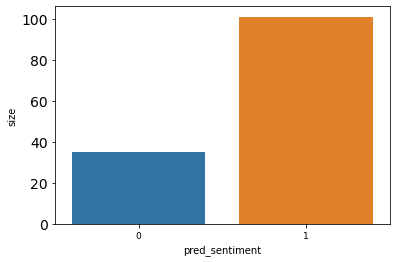

In [13]:
df= cyber.filter(['pred_sentiment']).groupby(['pred_sentiment'], as_index=False).size().sort_values(['pred_sentiment'], ascending= False)
plot = sns.barplot(x="pred_sentiment", y=str("size"), data= df,
            label="Total")
plot.tick_params(axis='x', labelsize=9)
plot.tick_params(axis='y', labelsize=14)

# - `Not liked`:

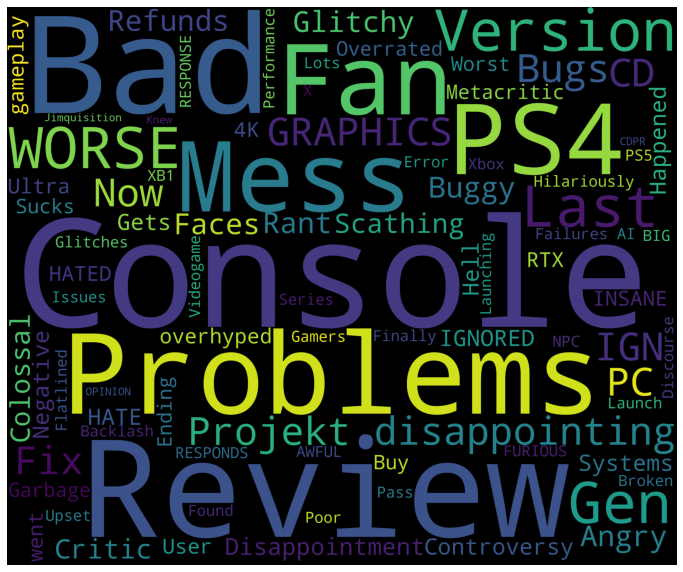

In [14]:
df = madeit[madeit['pred_sentiment']== 0] 

words = ' '.join(df['description'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
stopwords = set(STOPWORDS)

stopwords.add("cyberpunk")
stopwords.add("video")
stopwords.add("game")
stopwords.add("transcript'")
stopwords.add("know")
stopwords.add("going")
stopwords.add("confidence'")

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# - `Liked`:

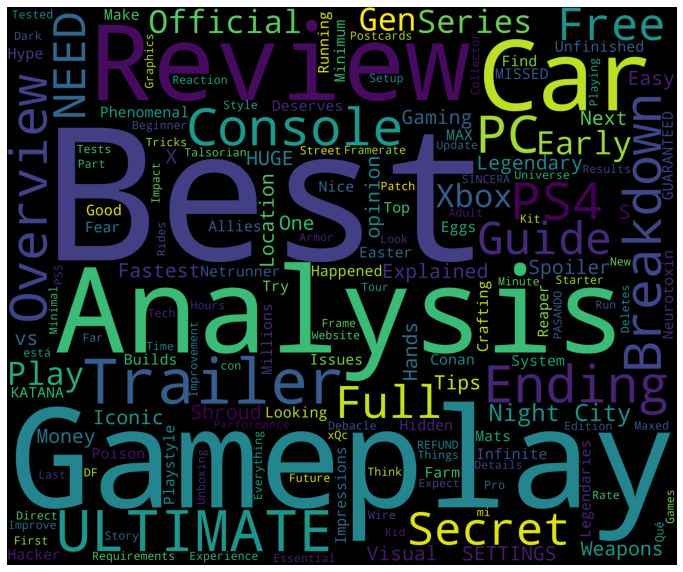

In [15]:
df = madeit[madeit['pred_sentiment']== 1] 

words = ' '.join(df['description'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
stopwords = set(STOPWORDS)

stopwords.add("cyberpunk")
stopwords.add("video")
stopwords.add("game")
stopwords.add("transcript'")
stopwords.add("know")
stopwords.add("going")
stopwords.add("confidence'")

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### For `transcript`, `not liked` it appears that the most common words are the following:
- `Console`
- `Problems`
- `PS4`
- `mess`
- `bad`

### For `transcript`, `liked` it appears that the most common words are the following:
- `Review`
- `gameplay`
- `best`
- `car`

# 2) `Conclusions`:

### - It seems that for `not liked` group, the most common words have `negative connotations`, such as `mess`, `Problems` or `bad`. Furthermore, as it was in the case of `transcripts`, there are also words related to the `plattform` in which the game is played, `Console` or `PS4`. This supports the theory presented in the previous transcript analysis, for the same group, `not liked`

### - In the group of `liked`, it apperas that the most common words are related to videos in which probably the author was `showing the game`, rather than critizacing. This can be seen across words like `gameplay`, `Review` or `car`. On the other hand, there are some words with a `positive connotation`, for example `best`. 

# 3) `Final conclusions`:

### - `Sentiment analysis` applied to the `youtube platform` could be an `attractive analysis` for some companies. Many people before buying the products review related videos on this plattform
### - This kind of analysis could be also usefull for `content creators`, because they will be able to extract information about what the people like the most
### - In some analysis such as the presented, it is `enough to have the title of the video`, rather than a partial transcript, however this would `depend of the analysis`
### - The current analysis showed that `after the release of the game Cyberpunk 2077`, the `youtube users didn't like` videos related to `technical aspects` of the game, about the `plattforms` or `criticism` of the game. However, it `should be analysed deeper in the video comments` if the people didn't like the videos because they `agree with the content` of the video (the didn't like the game) or just because they `didn't agree with the video` (they like the game)
### - In my opinion the `people may have been curious about the game`, for this reason the group of `liked videos` are mostly related to `gameplays`, about `features` of the game (for example `cars`) or `speaking well about the game`. This was expected, as the `videos were extracted just 6 days after the release` of the game, and probably a lot of possible buyers were looking for more information about the game